# Prodigy Finance ComputeFest2017 Exploratory Visualization Contest

The contest runs from Tuesday Jan 10th 11.30AM to Thursday Jan 12th 11.59PM. The maximum team size is 2 people, but you can compete individually.
[Prodigy Finance](https://prodigyfinance.com/) has very generously sponsored the ComputeFest and this project in particular. The prizes they have made available are two mystery pieces of electronics for the winning team!

The idea here is to do exploratory visualization in preparation for data analysis. The dataset we will use is from the UCI machine learning repository and can be found [here](https://archive.ics.uci.edu/ml/datasets/Covertype). The dataset contains cartographic variables that might be useful in predicting the kind of tree cover. Your visualizations should be useful to an analyst in creating machine learning models to analyze this dataset: you are looking for correlations between the "features" and the kind of tree cover.

The visualizations should preferably use technologies you learned in the Python in Data Science workshop such as matplotlib and Bokeh, but you are free to use other software such as R or Tableau. Make sure to label your axes clearly and caption and legend your images.

The deliverable for this project is a report which puts together these visualizations with some description of the visualizations (no long essays please!). This report should be in PDF or HTML format; Microsoft Word or Apple Pages formats will specifically not be accepted.

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Local functions 

In [3]:
def reverse_dummy(df, col_name, col_list):
    '''
    Takes a df, a column name and a list of dummy variable column names as arguments.
    Combines dummy variables into a single column and drops dummy variable columns.
    Returns df.
    '''
    df[col_name] = ''
    for i in col_list:
        df[col_name] = np.where(df[i] == 1, i, df[col_name])
    df = df.drop(col_list, axis = 1)
    
    #convert strings to numeric
    num_list = list(range(1, len(col_list) + 1))
    for num in num_list:
        df[col_name] = df[col_name].replace((col_name + str(num)), num)
    return df

def get_subset(df, stratify_by = 'cover_type', test_size = 1/50):
    '''
    Stratified sampling of original df for plotting.
    Default stratify_by = cover_type and test_size = 1/50.
    Returns new downsampled df.
    '''
    y = df[stratify_by]
    X = df
    _, _, _, to_plot = train_test_split(X, y, test_size = test_size, stratify = y)
    df_subset = df[df.index.isin(to_plot.index)]
    return df_subset

def plot_violin(y, data, x = 'cover_type', scale = 'count'):
    '''
    Creates a violinplot of y vs. x (default cover_type)
    '''
    return sns.violinplot(x = x, y = y, data = data, palette = 'Set2',
                          scale = scale, inner = 'quartile', scale_hue = False)

Load cover type data.

In [4]:
raw_file = pd.read_csv('covtype.data.gz', compression = 'gzip', header = None)

In [5]:
pd.set_option('display.max_columns', 100)
raw_file.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


The column names are missing in the raw file. Kaggle provides a smaller data set ('train.csv') with the column names [here](https://www.kaggle.com/c/forest-cover-type-prediction/data) as well as the names of the forest cover types.

In [22]:
#get column names from 'train.csv'
cols_file = pd.read_csv('train.csv.zip', compression = 'zip')
cols_file.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [21]:
cover_types = {
    1:'Spruce/Fir',
    2:'Lodgepole Pine',
    3:'Ponderosa Pine',
    4:'Cottonwood/Willow',
    5:'Aspen',
    6:'Douglas-fir',
    7:'Krummholz' 
}

train.csv has an extra column ('Id') that is not in the raw file provided by UCI. Drop 'Id' column and coerce column names to lowercase. Rename columns in raw_file and check for null values

In [23]:
cols_file = cols_file.drop('Id', axis = 1)
col_names = cols_file.columns.str.lower()
raw_file.columns = col_names
raw_file.head()
raw_file.isnull().values.any()

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points,wilderness_area1,wilderness_area2,wilderness_area3,wilderness_area4,soil_type1,soil_type2,soil_type3,soil_type4,soil_type5,soil_type6,soil_type7,soil_type8,soil_type9,soil_type10,soil_type11,soil_type12,soil_type13,soil_type14,soil_type15,soil_type16,soil_type17,soil_type18,soil_type19,soil_type20,soil_type21,soil_type22,soil_type23,soil_type24,soil_type25,soil_type26,soil_type27,soil_type28,soil_type29,soil_type30,soil_type31,soil_type32,soil_type33,soil_type34,soil_type35,soil_type36,soil_type37,soil_type38,soil_type39,soil_type40,cover_type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


False

There are two categorical variables (wilderness_area and soil_type) that are already one-hot-encoded. To perform exploratory data visualization it will be easier to reverse the one-hot-encoding.

In [24]:
#create lists of dummy variable column names
wild_area = list(raw_file.columns[10:14])
soil_type = list(raw_file.columns[14:54])

#make copy to keep raw_file, will need dummy variables later
features = raw_file.copy()
features = reverse_dummy(features, 'wilderness_area', wild_area)
features = reverse_dummy(features, 'soil_type', soil_type)

#shorten names
short_names = ['elevation aspect slope h_dist_hydro v_dist_hydro dist_road shade_9 shade_12 shade_3 dist_fire cover_type area soil'.split()]
features.columns = short_names

#replace cover type numbers with names
features['cover_type'].replace(cover_types, inplace = True)
features.head()

,elevation,aspect,slope,h_dist_hydro,v_dist_hydro,dist_road,shade_9,shade_12,shade_3,dist_fire,cover_type,area,soil
0,2596,51,3,258,0,510,221,232,148,6279,Aspen,1,29
1,2590,56,2,212,-6,390,220,235,151,6225,Aspen,1,29
2,2804,139,9,268,65,3180,234,238,135,6121,Lodgepole Pine,1,12
3,2785,155,18,242,118,3090,238,238,122,6211,Lodgepole Pine,1,30
4,2595,45,2,153,-1,391,220,234,150,6172,Aspen,1,29


## Exploratory data visualization

Our goal is to visualize the forest cover data to try and identify features that will be important for creating a model that predicts forest cover type. First, let's examine the class distributions of our ouputs, cover_type.

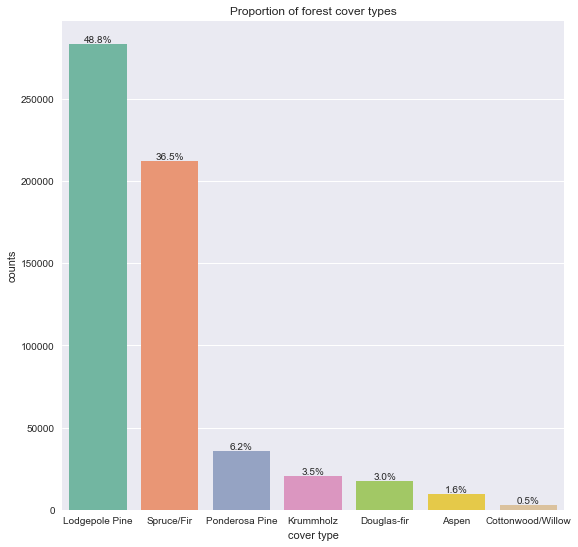

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 9)

counts = pd.DataFrame()
counts['raw'] = features['cover_type'].value_counts()
counts['percent'] = counts['raw'] / features['cover_type'].count()
counts['cover_type'] = counts.index.values
p = sns.barplot(x = 'cover_type', y = 'raw', data = counts, palette = 'Set2');
_ = p.set(xlabel = 'cover type', ylabel = 'counts', title = 'Proportion of forest cover types');

total = len(features)
for patch in p.patches:
    height = patch.get_height()
    _ = p.annotate('{:.1f}%'.format(100.*height/total), (patch.get_x() + 0.4, height), fontsize = 10,
            ha = 'center', va = 'bottom');

There is a very clear imbalance between the seven classes. This will need to be taken into account when we build our model for predictions. Furthermore, there are too many samples in the data set to visualize easily. We will thus select a subset of our data in a stratified manner to preserve the relative percentages of cover types for visualizations. During model training, oversampling of the less represented classes should be considered.

In [42]:
features_plot = get_subset(features)
features.shape
features_plot.shape

(581012, 13)

(11621, 13)

Let's remove the categorical variables as we will be plotting a pair-wise scatter plot.

In [28]:
area_soil = features_plot[['area', 'soil']]
features_plot.drop(['area', 'soil'], axis = 1, inplace = True)

/Users/yuwenwu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


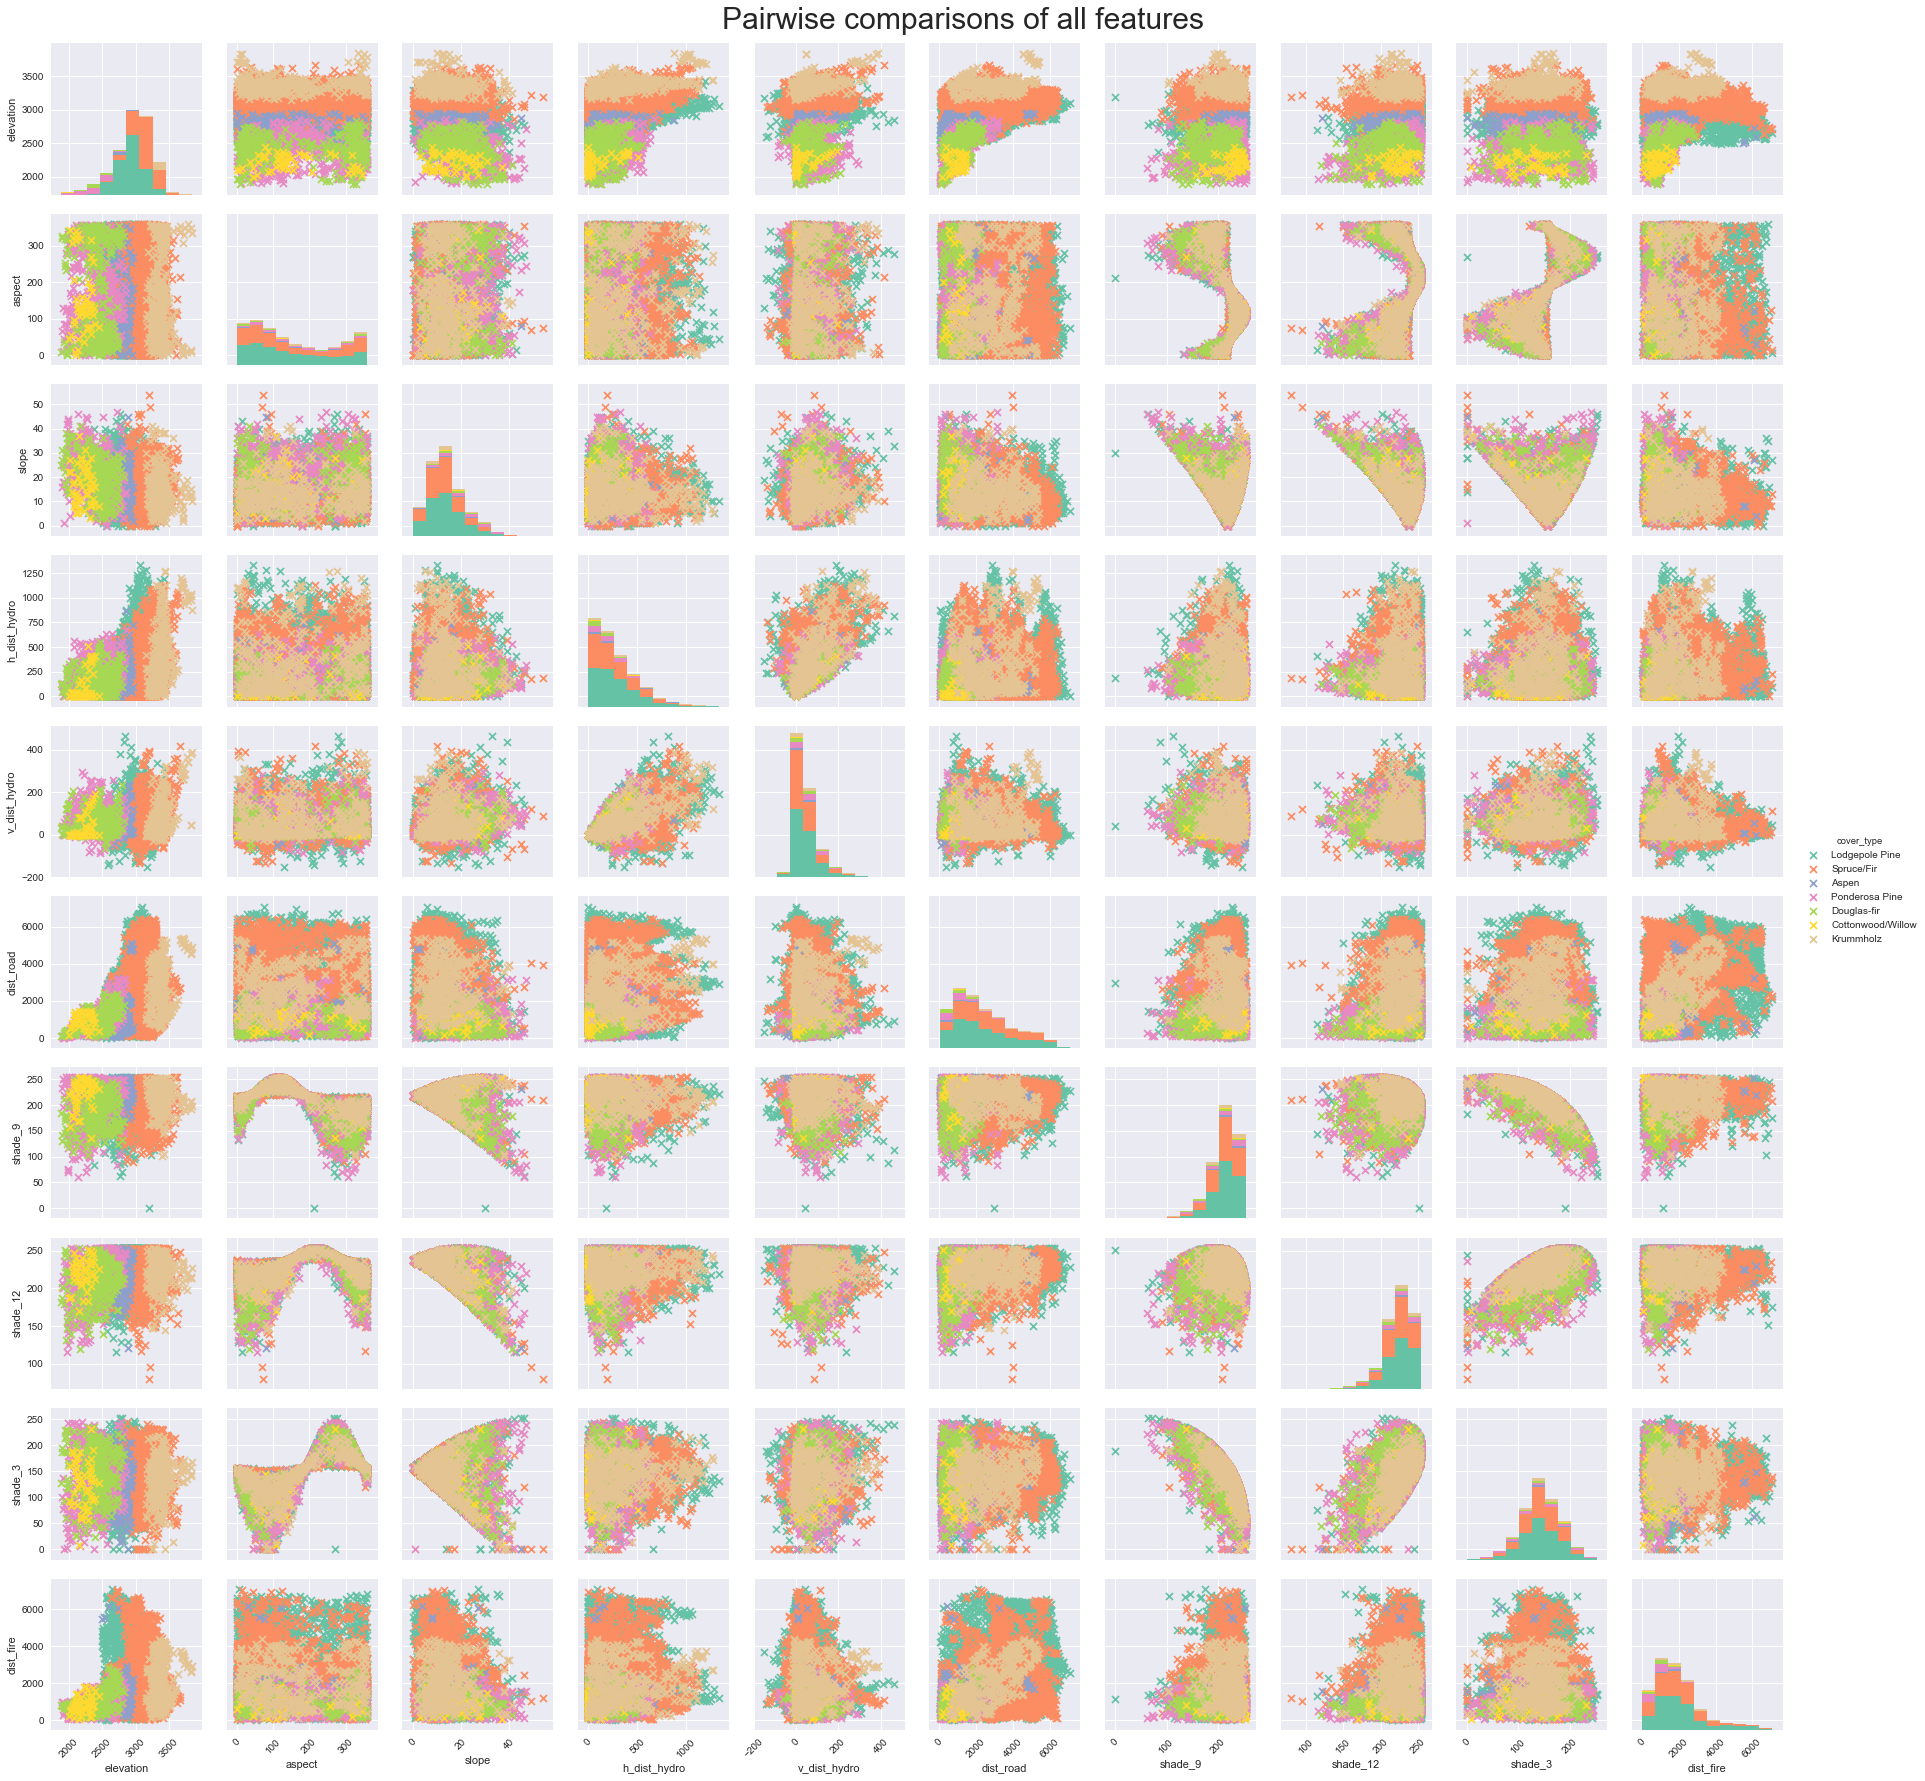

In [30]:
f = sns.pairplot(features_plot, hue = 'cover_type', markers = 'x', palette = 'Set2')
_ = f.fig.suptitle('Pairwise comparisons of all features', verticalalignment = 'top', fontsize = 30);
f.fig.subplots_adjust(top = 0.96);
for ax in f.axes.flat:
    _ = plt.setp(ax.get_xticklabels(), rotation=45);

Outputting the file allows more in-depth exploration of figure f compared to viewing in the notebook.

In [31]:
f.savefig('pairplot.png')

From figure f we note several things:
* Several features are correlated; however, many correlations are not simple linear ones, therefore Pearson's correlation will not capture the relationship between these variables. Furthermore, the non-linear relationships look spherical or periodic, consistent with angle measurements.
* Even though we don't have many featuers, dimensionality reduction could still aid in visualizing/identifying important features for classifications.
* Most of the quantitative features seem to be evenly distributed across the seven cover types.
* Elevation (top row) is the only feature where some clustering by cover type can be discerned.

## Plotting individual comparisons 

As elevation seemed to cluster data by cover type, let's plot elevation vs. cover type individually.

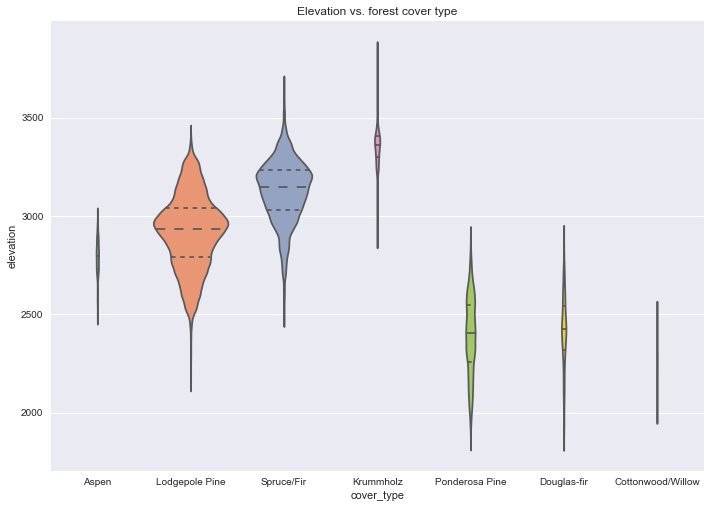

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27);
g1 = plot_violin('elevation', data = features, scale = 'count');
g1.set(title = 'Elevation vs. forest cover type');

Elevation achieves some separation between the cover types and will thus serve as a good predictor. Note the area of the violin plots are scaled by the number of samples per cover type.

Additionally, the pairplot cannot capture the relationship of cover types and the two categorical variables. Let's plot these separately.

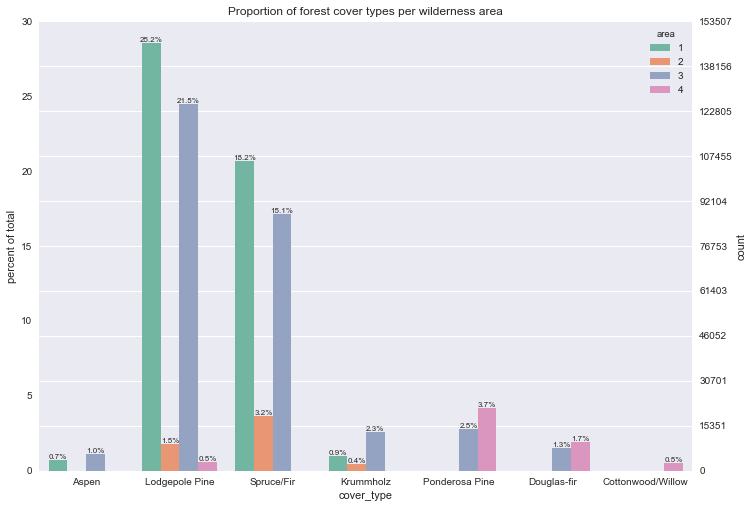

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27);
g = sns.countplot(x = 'cover_type', hue = 'area', data = features, palette = 'Set2')
_ = g.set(title = 'Proportion of forest cover types per wilderness area');

# Make twin axis
h = g.twinx()

# Switch so count axis is on right, frequency on left
h.yaxis.tick_left()
g.yaxis.tick_right()

# Also switch the labels over
g.yaxis.set_label_position('right')
h.yaxis.set_label_position('left')

_ = h.set_ylabel('percent of total')

total = len(features)
for p in g.patches:
    x = p.get_bbox().get_points()[:,0];
    y = p.get_bbox().get_points()[1,1];
    _ = g.annotate('{:.1f}%'.format(100.*y/total), (x.mean(), y), fontsize = 8,
            ha = 'center', va = 'bottom'); # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
_ = g.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range
_ = h.set_ylim(0, 30);
#g.set_ylim(0, ncount/2);

# And use a MultipleLocator to ensure a tick spacing of 10
h.yaxis.set_major_locator(ticker.MultipleLocator(5))

# Need to turn the grid on h off, otherwise the gridlines end up on top of the bars
h.grid(None)

We may be able to separate Spruce/Firs and Lodgepole pines from the other cover types by wilderness area, but any further splits on wilderness area alone are not possible. 

Although soil type is also a categorical variable, 40 subcategories are difficult to visualize with a bar plot. Therefore let's plot the individual soil type values by cover type. We'll overlay violin plots to help visualize the distribution of soil types.

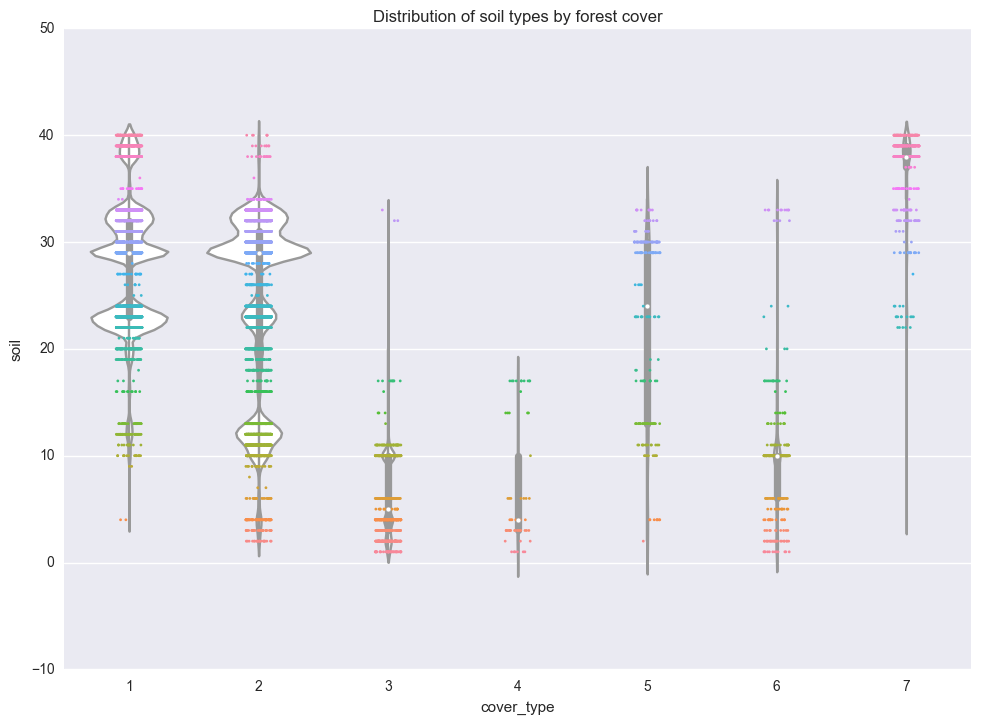

In [87]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27);
g3 = sns.stripplot(x = 'cover_type', y = 'soil', hue = 'soil', data = features_plot, 
                   jitter = True, size = 2);
sns.violinplot(x = 'cover_type', y = 'soil', data = features, scale = 'count', color = 'white');
g3.set(title = 'Distribution of soil types by forest cover');
g3.legend_.remove();

Soil type may allow us to split cover types into smaller subgroups.

Let's plot elevation, soil type and cover type together. To do so let's recombine area and soil types with the other data.

In [ ]:
features_plot = pd.concat([features_plot, area_soil], axis = 1)

We also need to re-code the cover types as numbers to color each data point via a color map.

In [44]:
for k, v in cover_types.items():
    features_plot.replace(v, k, inplace = True)

/Users/yuwenwu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


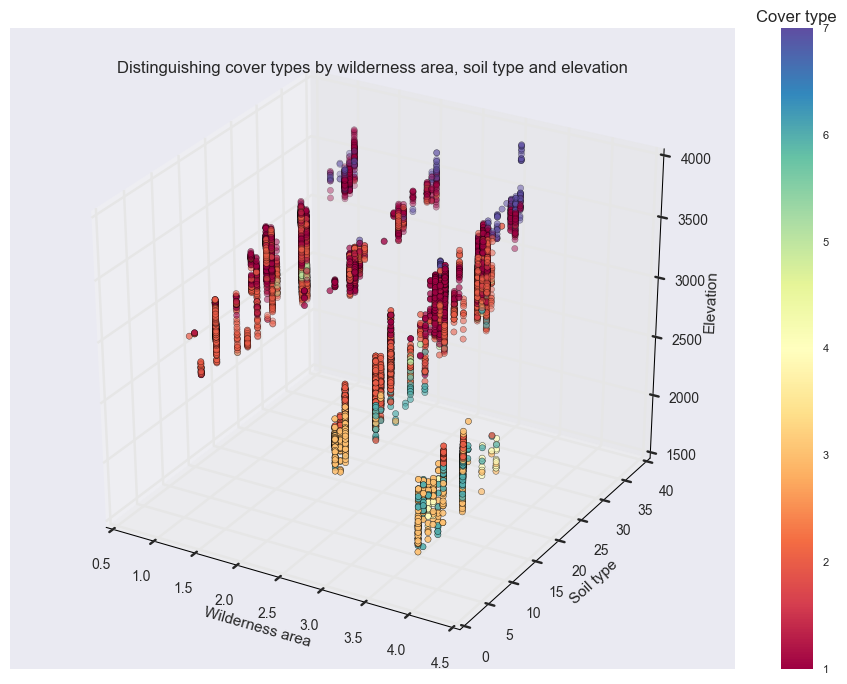

In [151]:
#set up 3D figure
fig = plt.figure()
fig.set_size_inches(11.7, 8.27);
ax = fig.add_subplot(111, projection='3d')

#make scatterplot
p = ax.scatter(xs = features_plot['area'], ys = features_plot['soil'], zs = features_plot['elevation'],
                  c = features_plot['cover_type'], cmap=plt.cm.Spectral);

#set axes
p = ax.dist = 10
p = ax.set_ylim(0, 40)

#add and format colorbar
cbar = fig.colorbar(p);
cbar.set_ticks([1, 2, 3, 4, 5, 6, 7]);
cbar.set_ticklabels([1, 2, 3, 4, 5, 6, 7]);
cbar.ax.tick_params(labelsize = 8); 

#add labels
p = cbar.ax.set_title('Cover type')
p = ax.set_title('Distinguishing cover types by wilderness area, soil type and elevation')
p = ax.set_xlabel('Wilderness area')
p = ax.set_ylabel('Soil type')
p = ax.set_zlabel('Elevation')

This plot suggests classification of forest cover type by these three features may be a good place to start; however, there is still a lot of overlap between the different cover types, particularly between cover types 1 and 2. We also haven't explored the other features at all.

## Dimensionality reduction 

Although this data set only has 12 features, it is still difficult to visualize the interactions of all the features and identify those that will be important for predicting forest cover type. Although we've identified three features (see 3D plot above) that may be a good starting point for our model, we want to know if we can reduce the overlap even further. Therefore, dimensionality reduction may still aid visualization and feature selection.

### Data processing 

We subsample our full data set and standardize the resulting data so that we can run our dimensionality reduction techniques. Using the full data set would be ideal, but the computational complexity is a problem for personal computers.

In [49]:
data_subset = get_subset(raw_file)

Features need to be standardized for dimensionality reduction; one-hot-encoded variables don't need to be scaled

In [50]:
features_to_scale = data_subset.iloc[:, 0:10]
scaled_features = (features_to_scale - features_to_scale.mean()) / features_to_scale.std()

#merge dfs of standardized and dummy features back together
df_reduction = pd.concat([scaled_features, data_subset.iloc[:, 10:-1]], axis = 1)
df_reduction.head()

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points,wilderness_area1,wilderness_area2,wilderness_area3,wilderness_area4,soil_type1,soil_type2,soil_type3,soil_type4,soil_type5,soil_type6,soil_type7,soil_type8,soil_type9,soil_type10,soil_type11,soil_type12,soil_type13,soil_type14,soil_type15,soil_type16,soil_type17,soil_type18,soil_type19,soil_type20,soil_type21,soil_type22,soil_type23,soil_type24,soil_type25,soil_type26,soil_type27,soil_type28,soil_type29,soil_type30,soil_type31,soil_type32,soil_type33,soil_type34,soil_type35,soil_type36,soil_type37,soil_type38,soil_type39,soil_type40
9,-1.239574,-0.857306,-0.546780,-0.105034,-0.605534,-1.096643,0.584200,-0.201615,-0.467589,3.234362,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
71,0.173990,-0.982386,-0.015643,0.036441,-0.622704,2.548520,0.397544,-0.753883,-0.676019,0.808032,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
154,0.534520,0.500700,0.382710,0.729672,0.149967,2.369281,-0.311750,1.555599,1.017475,0.033946,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
265,0.780823,-1.044925,-0.546780,-1.269850,-0.794409,1.223295,0.285550,-0.302027,-0.285212,0.969078,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
525,0.056193,0.875939,-0.281211,1.635115,0.218649,2.172881,-0.722395,1.254363,1.330120,1.342068,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [51]:
array_reduction = df_reduction.as_matrix()

## PCA 

We will first run PCA to see whether we can successfully reduce our data using a linear method, although the pairplot suggests this will be challenging due to the existence of periodicity and spherical relationships in the data.

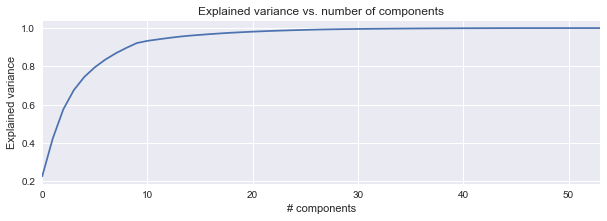

In [57]:
pca = PCA()
pca_fit = pca.fit(array_reduction)
reduced = pca.fit_transform(array_reduction)

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax = pd.Series(pca_fit.explained_variance_ratio_.cumsum()).plot(kind = 'line', figsize = (10,3));
_ = ax.set(xlabel = '# components', ylabel = 'Explained variance',
      title = 'Explained variance vs. number of components');

In [55]:
num_comp = 10
pca2 = PCA(n_components = num_comp)
pca2_fit = pca2.fit(array_reduction)

print('{:.2%}'.format(pca2_fit.explained_variance_ratio_.cumsum()[-1]) + ' of the variance is explained by the first ' + str(num_comp) + ' components')

92.21% of the variance is explained by the first 10 components


We can see that we can reduce our data down to 10 components. 

**Caveat:** PCA is not recommended for categorical data or a mix of categorical and quantitative data. Linear discriminant analysis or multiple correspondance analysis were suggested as potential alternatives. But at the very least, we know we can reduce the number of features in our model to a subset of our original features, and we can identify the features underlying the principal components and test whether these features can help predict forest cover.

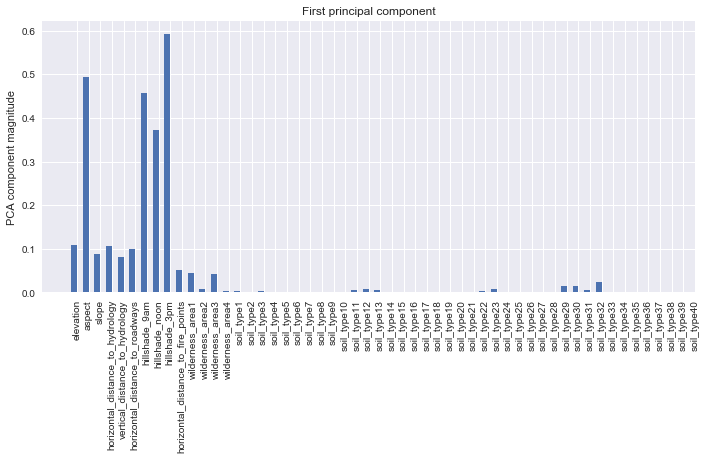

In [64]:
fig = plt.figure()
fig.set_size_inches(11.7, 5);
first_comp = abs(pca2_fit.components_[0])
ax = plt.bar(range(50), first_comp[0:50], 0.5)
_ = plt.xticks(np.arange(54) + 0.25, df_reduction.columns, rotation = 'vertical')
_ = plt.ylabel('PCA component magnitude')
_ = plt.title('First principal component')

From the plot of the first principal component, we note that **hillshade** and **aspect** (features relating to how much sunlight is received) make up most of the first principal component. These were features that were difficult to identify from simple pairwise comparisons, highlighting the importance of examining the entire feature space. 

Again, however, we must keep certain caveats in mind, namely: 1) we do know there is a fair amount of nonlinearity in the data, which PCA may not capture (a nonlinear kernel may help), and 2) the categorical data are likely not well represented. For example, it is unclear whether their individual component magnitudes should be summed to determine the contribution of these categories; as already mentioned, other methods may be superior.

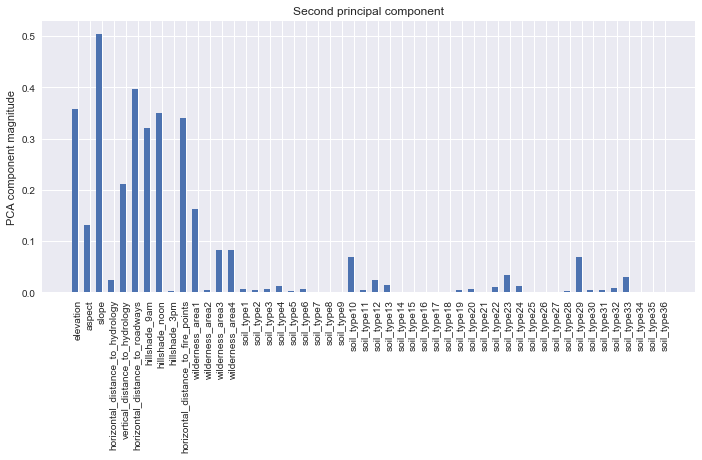

In [67]:
fig = plt.figure()
fig.set_size_inches(11.7, 5);
second_comp = abs(pca2_fit.components_[1])
ax = plt.bar(range(50), second_comp[0:50], 0.5)
_ = plt.xticks(np.arange(50) + 0.25, df_reduction.columns, rotation = 'vertical')
_ = plt.ylabel('PCA component magnitude')
_ = plt.title('Second principal component')

The second principal component is slightly more complicated, but, in addition to hillshade, **slope** of the hill, **distance to roadways**, **elevation** and **distance to fire points** all seem to contribute. Overall, our PCA has identified features related to hill shape as important ones to include in a classifier. It looks like wilderness area, if summed across the four areas, also has an important contribution.

## t-SNE 

Unlike PCA, t-SNE can handle complex relationships beyond simple linear ones. Furthermore, if t-SNE can identify clusters in our data, we can try and match features to those clusters, similar to how features underlying principal components are identified.

In [61]:
model = TSNE() #default is the faster Barnes-Hut method
tsne_fit = model.fit_transform(array_reduction)

**Note:** In reality t-SNE needs to be run multiple times to tune its hyperparameters and to find the clustering with the lowest error.

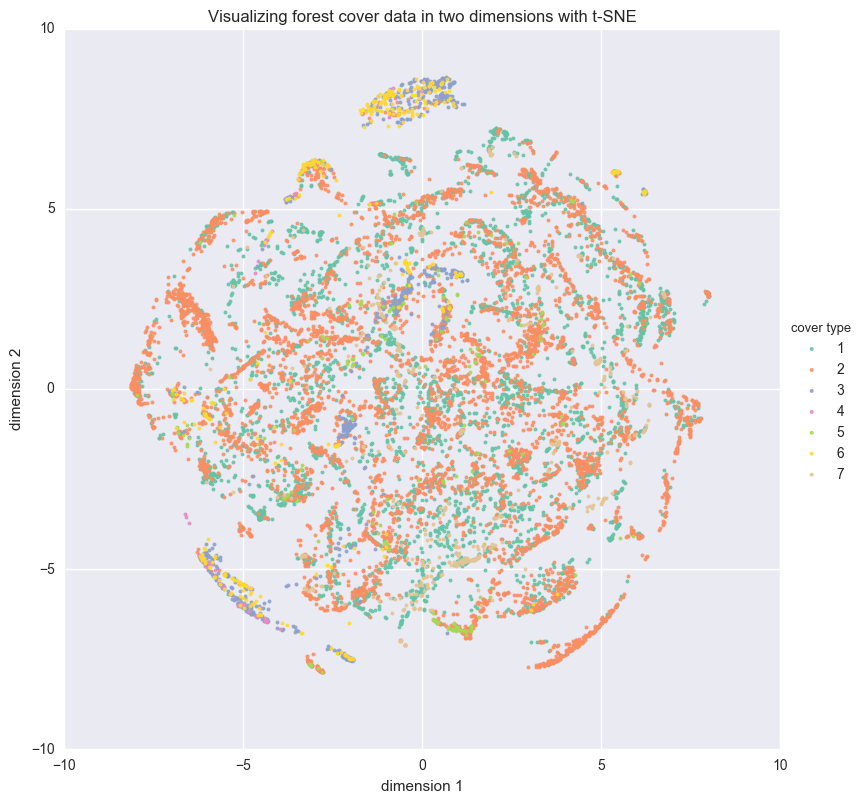

In [64]:
tsne_df = pd.DataFrame(tsne_fit, columns = ['dimension 1', 'dimension 2'], index = data_subset.index)
tsne_df['cover type'] = data_subset['cover_type']
ax = sns.lmplot('dimension 1', 'dimension 2', tsne_df, hue = 'cover type', palette = 'Set2', fit_reg=False, 
               size = 8,scatter_kws={'alpha':0.9,'s':8})
_ = ax.set(title = 'Visualizing forest cover data in two dimensions with t-SNE', ylim = (-10, 10))

We can see some potential clusters in the data. In particular, we see that cover types 3, 4 and 6 tend to cluster together. Cover types 1 and 2 also tend to overlap, consistent with what we noted earlier. More rigorous runs could be performed to try and identify greater structure in the data.